In [1]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import files
# upload polution_dataSet.npy file
uploaded = files.upload()
# import data into a dataframe
import io
data = np.load(io.BytesIO(uploaded['polution_dataSet.npy']))

Saving polution_dataSet.npy to polution_dataSet.npy


In [0]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 1      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 7000
VAL_SIZE = 1000
TEST_SIZE = 2000
TIMESTEPS = 24           # timesteps used for a single prediction (here each timestep is an hour)

In [0]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [0]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [0]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [0]:
from keras import backend
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40)                7840      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0268 - val_loss: 0.0257
Epoch 2/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.0182 - val_loss: 0.0171
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 4/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 6/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 7/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.0150 - val_loss: 0.0137
Epoch 8/20
7000/7000 [==============================] - 9s 1ms/step - loss: 0.0145 - val_loss: 0.0174
Epoch 9/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 10/20
7000/7000 [=======

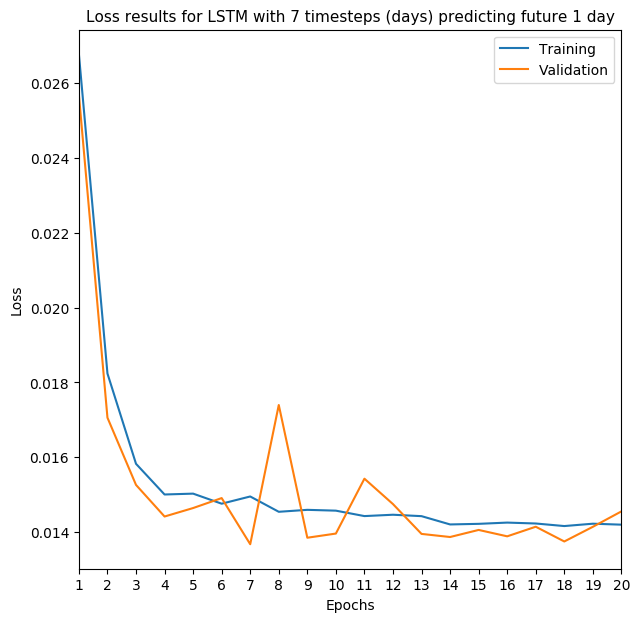

In [100]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for LSTM with 7 timesteps (days) predicting future 1 day', fontsize=11)
plt.legend()
plt.show()

In [87]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.026772429717571607, 0.018239375000619996, 0.015826981923143777, 0.01500673168571666, 0.015029646417658244, 0.014760754272740867, 0.014953565649422152, 0.014544410950371197, 0.014596549122860389, 0.014574665888212622, 0.014429613405705562, 0.01446566466375121, 0.01442768959760932, 0.014206301462503948, 0.014222346128496741, 0.014255696296625372, 0.014231567925640514, 0.014163154463416764, 0.014226070176477411, 0.014200315637447471]
test loss history: [0.025686221132054925, 0.017059303051792086, 0.015262884956318884, 0.014418062611948699, 0.014644457111135125, 0.01491083726636134, 0.013677672180347145, 0.017398173362016676, 0.013851274470798671, 0.013962558646453545, 0.015429205666296185, 0.014749909066595138, 0.013953237290261314, 0.013870209099259227, 0.014059452009387314, 0.01388864332344383, 0.014145142629276962, 0.013751159505336546, 0.014143072570441291, 0.01455487517407164]
2000/2000 [==============================] - 1s 255us/step

Test result loss: 0.013


In [0]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

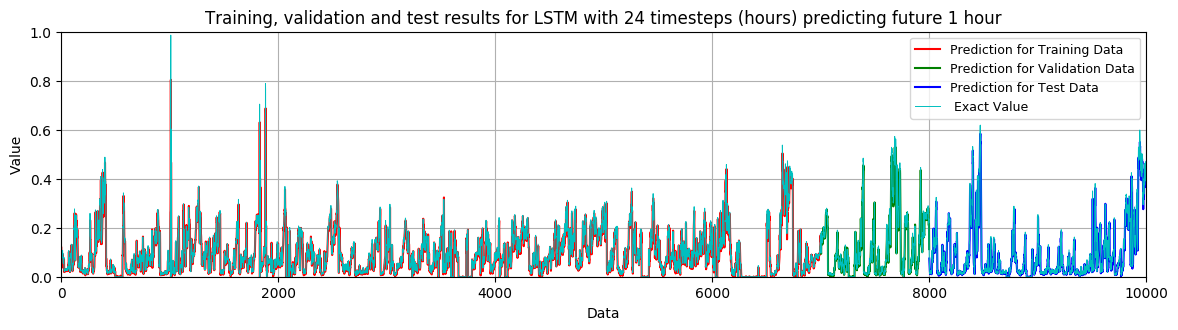

In [101]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for LSTM with 24 timesteps (hours) predicting future 1 hour')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

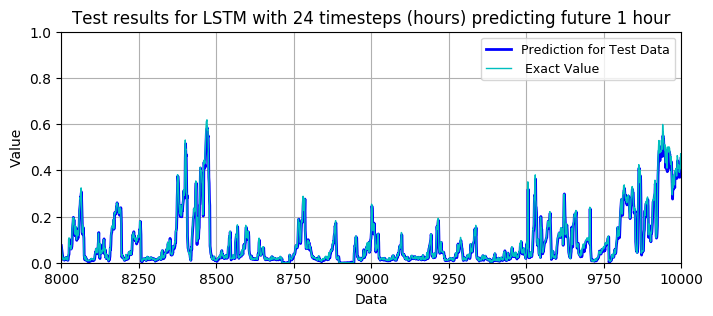

In [102]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for LSTM with 24 timesteps (hours) predicting future 1 hour')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()